## pandas 관련 질문

### 1.'원'이라는 글자 삭제하기

In [ ]:
import pandas as pd
import numpy as np

data = [['박세리', '1980-01-02', '여자', '3000원'],
        ['이대호', '1982-02-22', '여자', '2500원'],
        ['손흥민', '1993-06-12', '여자', '1500원'],
        ['김연아', '1988-10-16', '여자', '2000원'],
        ['마이클조던', '1970-03-03', '여자', np.nan],
        ['타이거우즈', np.nan, np.nan, '3500원']]
df = pd.DataFrame(data, columns=['고객명', '생년월일', '성별', '연봉'])
df

,고객명,생년월일,성별,연봉
0,박세리,1980-01-02,여자,3000원
1,이대호,1982-02-22,여자,2500원
2,손흥민,1993-06-12,여자,1500원
3,김연아,1988-10-16,여자,2000원
4,마이클조던,1970-03-03,여자,NaN
5,타이거우즈,NaN,NaN,3500원


In [ ]:
# 1번 질문 연봉 열에서 '원'삭제하기
# 먼저 NaN을 제거하고, '원'을 제거한 뒤, 타입변경을 하시면 됩니다.
# '원'을 제거할 때는 replace를 사용하면 편리합니다. regex=True와 함께 사용하셔야 합니다.

df['연봉'] = df['연봉'].fillna('0').replace('원', '', regex=True).astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객명     6 non-null      object
 1   생년월일    5 non-null      object
 2   성별      5 non-null      object
 3   연봉      6 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 320.0+ bytes


In [ ]:
df

,고객명,생년월일,성별,연봉
0,박세리,1980-01-02,여자,3000
1,이대호,1982-02-22,여자,2500
2,손흥민,1993-06-12,여자,1500
3,김연아,1988-10-16,여자,2000
4,마이클조던,1970-03-03,여자,0
5,타이거우즈,NaN,NaN,3500


### 2.날짜가 문자열로 변경되면서 시:분:초 표시됨

In [ ]:
# 2번은 맨 아래 있는 total 때문으로 생각됩니다.

In [ ]:
df.index = pd.date_range('2021-01-01', periods=len(df), freq='M')
df['추가'] = [100, 200, 50, 20, 300, 150]
df

,고객명,생년월일,성별,연봉,추가
2021-01-31,박세리,1980-01-02,여자,3000,100
2021-02-28,이대호,1982-02-22,여자,2500,200
2021-03-31,손흥민,1993-06-12,여자,1500,50
2021-04-30,김연아,1988-10-16,여자,2000,20
2021-05-31,마이클조던,1970-03-03,여자,0,300
2021-06-30,타이거우즈,NaN,NaN,3500,150


In [ ]:
df.index

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
df.loc['total', '연봉':'추가'] = df.loc['2021-01-31':'2021-06-30', '연봉':'추가'].sum()
df

,고객명,생년월일,성별,연봉,추가
2021-01-31 00:00:00,박세리,1980-01-02,여자,3000.0,100.0
2021-02-28 00:00:00,이대호,1982-02-22,여자,2500.0,200.0
2021-03-31 00:00:00,손흥민,1993-06-12,여자,1500.0,50.0
2021-04-30 00:00:00,김연아,1988-10-16,여자,2000.0,20.0
2021-05-31 00:00:00,마이클조던,1970-03-03,여자,0.0,300.0
2021-06-30 00:00:00,타이거우즈,NaN,NaN,3500.0,150.0
total,NaN,NaN,NaN,12500.0,820.0


In [ ]:
df.index

Index([2021-01-31 00:00:00, 2021-02-28 00:00:00, 2021-03-31 00:00:00,
       2021-04-30 00:00:00, 2021-05-31 00:00:00, 2021-06-30 00:00:00,
                   'total'],
      dtype='object')

In [ ]:
# 다음과 같이 수정해 보시기 바랍니다.
data = [['박세리', '1980-01-02', '여자', '3000원'],
        ['이대호', '1982-02-22', '여자', '2500원'],
        ['손흥민', '1993-06-12', '여자', '1500원'],
        ['김연아', '1988-10-16', '여자', '2000원'],
        ['마이클조던', '1970-03-03', '여자', np.nan],
        ['타이거우즈', np.nan, np.nan, '3500원']]
df = pd.DataFrame(data, columns=['고객명', '생년월일', '성별', '연봉'])
df.index = pd.date_range('2021-01-01', periods=len(df), freq='M')
df['연봉'] = df['연봉'].fillna('0').replace('원', '', regex=True).astype('int64')
df['추가'] = [100, 200, 50, 20, 300, 150]
df

,고객명,생년월일,성별,연봉,추가
2021-01-31,박세리,1980-01-02,여자,3000,100
2021-02-28,이대호,1982-02-22,여자,2500,200
2021-03-31,손흥민,1993-06-12,여자,1500,50
2021-04-30,김연아,1988-10-16,여자,2000,20
2021-05-31,마이클조던,1970-03-03,여자,0,300
2021-06-30,타이거우즈,NaN,NaN,3500,150


In [ ]:
df.index = df.index.astype('str')  # 문자열로 변경
df.loc['total', '연봉':'추가'] = df.loc['2021-01-31':'2021-06-30', '연봉':'추가'].sum()
df

,고객명,생년월일,성별,연봉,추가
2021-01-31,박세리,1980-01-02,여자,3000.0,100.0
2021-02-28,이대호,1982-02-22,여자,2500.0,200.0
2021-03-31,손흥민,1993-06-12,여자,1500.0,50.0
2021-04-30,김연아,1988-10-16,여자,2000.0,20.0
2021-05-31,마이클조던,1970-03-03,여자,0.0,300.0
2021-06-30,타이거우즈,NaN,NaN,3500.0,150.0
total,NaN,NaN,NaN,12500.0,820.0


### 3.피벗테이블

In [ ]:
# [3]번  피벗테이블

# 정렬에 대해서는 저도 처음 본 것 같습니다.  좀 더 확인해 볼께요 ^^
# 출력 형식 DataFrame 일텐데요.  print()를 이용해서 출력해 보시겠어요?  
# 그래도 다르게 나오시나요?


In [ ]:
# [4] 번
import seaborn as sns
df = sns.load_dataset('titanic')
result=df.groupby(['who','pclass'])['survived'].agg(['sum','mean']).reset_index().sort_values(by='mean', ascending=False) 
result=result.reset_index(drop=True) 
result

,who,pclass,sum,mean
0,child,2,19,1.000000
1,woman,1,89,0.978022
2,woman,2,60,0.909091
3,child,1,5,0.833333
4,woman,3,56,0.491228
5,child,3,25,0.431034
6,man,1,42,0.352941
7,man,3,38,0.119122
8,man,2,8,0.080808


In [ ]:
# reset_index()를 실행해서 얻게되는 결과가 다릅니다.
# 위에서 첫 번째 reset_index()는 실제로 index에 있는 것을 columns로 돌리는 역활을 합니다.
# 두 번째 reset_index(drop=True)는 인덱스 번호를 0, 1, 2, .... 로 만드는 역활을 합니다.

# 아래의 groupby로 생성된 index를 columns로 이동하는 동작을 하는 것이 첫 번째 reset_index()의 역활이죠.

# 각각 실행해 보세요
df.groupby(['who','pclass'])['survived'].agg(['sum','mean'])
#df.groupby(['who','pclass'])['survived'].agg(['sum','mean']).reset_index()

sum      mean
who   pclass               
child 1         5  0.833333
      2        19  1.000000
      3        25  0.431034
man   1        42  0.352941
      2         8  0.080808
      3        38  0.119122
woman 1        89  0.978022
      2        60  0.909091
      3        56  0.491228

In [ ]:
# 그런데 drop=True를 사용하면 index를 column로 돌리는 것이 아니라
# 기존 index 제거하고 RangeIndex를 새롭게 넣기 때문에 who, pclass라는 것이 제거됩니다.
df.groupby(['who','pclass'])['survived'].agg(['sum','mean']).reset_index(drop=True)

,sum,mean
0,5,0.833333
1,19,1.000000
2,25,0.431034
3,42,0.352941
4,8,0.080808
5,38,0.119122
6,89,0.978022
7,60,0.909091
8,56,0.491228


In [ ]:
# 이것은 성공!
df.groupby(['who','pclass'])['survived'].agg(['sum','mean']).reset_index().sort_values(by='mean', ascending=False).reset_index(drop=True) 

,who,pclass,sum,mean
0,child,2,19,1.000000
1,woman,1,89,0.978022
2,woman,2,60,0.909091
3,child,1,5,0.833333
4,woman,3,56,0.491228
5,child,3,25,0.431034
6,man,1,42,0.352941
7,man,3,38,0.119122
8,man,2,8,0.080808


In [ ]:
# 이것은 실패가 됩니다.
df.groupby(['who','pclass'])['survived'].agg(['sum','mean']).reset_index(drop=True).sort_values(by='mean', ascending=False)

,sum,mean
1,19,1.000000
6,89,0.978022
7,60,0.909091
0,5,0.833333
8,56,0.491228
2,25,0.431034
3,42,0.352941
5,38,0.119122
4,8,0.080808


### 4.음수
- read_sql로 불러온 칼럼들은 모두 object로 강제변환되서, 필요한 열을 숫자로 형변환을 하려합니다.
- 양수가 아닌 음수값들에 붙어있는 ‘-’때문에 자꾸 오류나고 변환이 안됩니다
- 천단위 자릿수‘,’는 replace로 삭제해서 해결했는데, 음수‘-’는 어떻게 해야하는지 궁금

In [ ]:
import pandas as pd

s = pd.Series(['1,230', '-12,345', '123', '123,456,190', '-8,900'])
B = s.replace(',', '', regex=True).astype('int32')
B

0         1230
1       -12345
2          123
3    123456190
4        -8900
dtype: int32

### 5.'\*' 과 '*'의 차이
- Series.replace('\*', '', regex=True) 와 Series.replace('*', '', regex=True)의 차이점이 있나요?

In [ ]:
import pandas as pd

s = pd.Series(['*123', '12*3', '123*', '**12**3**'])
try :
    r1 = s.replace('*', '', regex=True) ## error: nothing to repeat at position 0
except Exception as e:
    r1 = None
    print(e)

r2 = s.replace('\*', '', regex=True)
r3 = s.str.replace('\*', '', regex=True)
print(r1, r2, r3, sep='\n')

nothing to repeat at position 0
None
0    123
1    123
2    123
3    123
dtype: object
0    123
1    123
2    123
3    123
dtype: object


### 6.문자열 분리
- 주소, 전화번호와 같이 여러 가지 정보가 포함된 문자열의 사용
- https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str
- [참고 : dt] https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-dt

In [ ]:
import pandas as pd

df = pd.DataFrame({'address': ['서울 중랑구 면목동', 
                               '서울 동대문구 청량리동', 
                               '서울 동대문구 회기동',
                               '서울 성동구 성수동'],
                   'phone': ['010-1234-5678', '011-2345-1211', 
                             '010-5671-9811', '017-8961-0087']})
df

,address,phone
0,서울 중랑구 면목동,010-1234-5678
1,서울 동대문구 청량리동,011-2345-1211
2,서울 동대문구 회기동,010-5671-9811
3,서울 성동구 성수동,017-8961-0087


In [ ]:
address = df['address']
s = address.str.split()
si, gu, dong = s.str[0], s.str[1], s.str[2]
df['si'] = s.str[0]
df['gu'] = s.str[1]
df['dong'] = s.str[2]
#print(si, gu, dong, sep='\n')
df

,address,phone,si,gu,dong
0,서울 중랑구 면목동,010-1234-5678,서울,중랑구,면목동
1,서울 동대문구 청량리동,011-2345-1211,서울,동대문구,청량리동
2,서울 동대문구 회기동,010-5671-9811,서울,동대문구,회기동
3,서울 성동구 성수동,017-8961-0087,서울,성동구,성수동


In [ ]:
phone = df['phone']

df['phone_f3'] = phone.str.split('-').str[0]
#df['phone_f3'] = phone.str[:3]
df

,address,phone,si,gu,dong,phone_f3
0,서울 중랑구 면목동,010-1234-5678,서울,중랑구,면목동,010
1,서울 동대문구 청량리동,011-2345-1211,서울,동대문구,청량리동,011
2,서울 동대문구 회기동,010-5671-9811,서울,동대문구,회기동,010
3,서울 성동구 성수동,017-8961-0087,서울,성동구,성수동,017


In [ ]:
# 11월 13일 강의 시간 txt 파일 정리는 별도로 다시 해서 공유하겠습니다.
# 아래의 불균형 데이터 처리, statistical_test 함수 사용은 필수는 아닙니당

### 7.불균형 데이터인 경우 

In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

Cloning into 'bigdata'...
remote: Enumerating objects: 50, done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (50/50), done.


In [ ]:
# [0] x_train, x_test 데이터로 불균형 데이터를 생성함
from sklearn.model_selection import train_test_split

dftot = pd.read_csv('./bigdata/1st_Train.csv')
A = dftot.groupby('Reached.on.Time_Y.N')

A0 = A.get_group(0).sample(frac=0.15)  # 15% 샘플링
A1 = A.get_group(1)  # 전체
dftot2 = pd.concat([A0, A1])

x_train, x_test = train_test_split(dftot2, test_size=0.4,
                                   stratify=dftot2['Reached.on.Time_Y.N'], random_state=0)
y_train = x_train[['ID','Reached.on.Time_Y.N']]
x_train = x_train.drop(columns='Reached.on.Time_Y.N')
y_test = x_test[['ID','Reached.on.Time_Y.N']]   # 이것은 시험에서는 제공되지 않음
x_test = x_test.drop(columns='Reached.on.Time_Y.N')

x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False) # 이것은 시험에서는 제공되지 않음

In [ ]:
# [1] 불균형 데이터 (x_train.csv, y_train.csv, x_test.csv) 읽어오기
X = pd.read_csv('x_train.csv')
Y = pd.read_csv('y_train.csv')
X_submission = pd.read_csv('x_test.csv')
print(X.shape, Y.shape, X_submission.shape)

(4336, 11) (4336, 2) (2892, 11)


In [ ]:
X.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [ ]:
Y.columns

Index(['ID', 'Reached.on.Time_Y.N'], dtype='object')

In [ ]:
Y['Reached.on.Time_Y.N'].value_counts()   # 10배 차이

1    3937
0     399
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336 entries, 0 to 4335
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   4336 non-null   int64 
 1   Warehouse_block      4336 non-null   object
 2   Mode_of_Shipment     4336 non-null   object
 3   Customer_care_calls  4336 non-null   int64 
 4   Customer_rating      4336 non-null   int64 
 5   Cost_of_the_Product  4336 non-null   int64 
 6   Prior_purchases      4336 non-null   int64 
 7   Product_importance   4336 non-null   object
 8   Gender               4336 non-null   object
 9   Discount_offered     4336 non-null   int64 
 10  Weight_in_gms        4336 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 372.8+ KB


In [ ]:
X.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [ ]:
dfXY = pd.merge(X, Y, on='ID')
dfXY.shape, dfXY.columns

((4336, 12),
 Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
        'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
        'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
        'Reached.on.Time_Y.N'],
       dtype='object'))

In [ ]:
from scipy import stats

def statistical_test(mode, df, cat, target):
    uniques= df[cat].unique()    
    if mode == 't':  #  t-test (회귀)
        group = df.groupby(cat)[target]
        samples = [group.get_group(i) for i in uniques]
        value, p = stats.ttest_ind(*samples)        
    elif mode == 'f':  #  anova  (회귀)
        group = df.groupby(cat)[target]
        samples = [group.get_group(i) for i in uniques]
        value, p = stats.f_oneway(*samples)
    elif mode == 'c':  # chi-square (분류)
        contingency = pd.crosstab(index=df[cat], columns=df[target])
        value, p, df, expected = stats.chi2_contingency(contingency)
        
    return value, p, 'Statistically Signifcant' if p <= 0.05 else 'Statistically Insignifcant'

In [ ]:
# object 타입의 데이터를 Encoding 해야 함

o_features = ['Warehouse_block', 'Mode_of_Shipment', 
              'Product_importance', 'Gender']

# 카이제곱검정
for feature in o_features:
    r = statistical_test('c', dfXY, feature, 'Reached.on.Time_Y.N')  
    print(*r)        

2.6702342010770748 0.6144332009822803 Statistically Insignifcant
2.6400890195826134 0.267123412093919 Statistically Insignifcant
3.7819854858785673 0.15092190778374062 Statistically Insignifcant
0.42991098817614015 0.512032628216019 Statistically Insignifcant


In [ ]:
features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
X = dfXY[features]
Y = dfXY['Reached.on.Time_Y.N']

r = train_test_split(X, Y, stratify=Y, random_state=123)
x_train, x_test, y_train, y_test = r
[x.shape for x in r]

[(3252, 6), (1084, 6), (3252,), (1084,)]

In [ ]:
from imblearn import over_sampling
dir(over_sampling)

['ADASYN',
 'BorderlineSMOTE',
 'KMeansSMOTE',
 'RandomOverSampler',
 'SMOTE',
 'SMOTEN',
 'SMOTENC',
 'SVMSMOTE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_adasyn',
 '_random_over_sampler',
 '_smote',
 'base']

In [ ]:
## over_sampling 은 train 데이터에만 적용하는 것이다
from imblearn.over_sampling import SMOTE, ADASYN

smote = ADASYN(random_state=0)
#dir(smote)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)
y_train_over.value_counts()

0    3014
1    2953
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(x_train_over, y_train_over)
model.score(x_train_over, y_train_over), model.score(x_test, y_test)

(0.9998324115971174, 0.7583025830258303)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state=0)
model2.fit(x_train, y_train)
model2.score(x_train, y_train), model2.score(x_test, y_test)

(1.0, 0.9059040590405905)

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.16      0.37      0.22       100
           1       0.93      0.80      0.86       984

    accuracy                           0.76      1084
   macro avg       0.54      0.58      0.54      1084
weighted avg       0.85      0.76      0.80      1084



In [ ]:
from sklearn.metrics import classification_report
y_pred = model2.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.25      0.01      0.02       100
           1       0.91      1.00      0.95       984

    accuracy                           0.91      1084
   macro avg       0.58      0.50      0.48      1084
weighted avg       0.85      0.91      0.86      1084



균형 데이터 사용, statistical_test 해보장

In [ ]:
# [0] x_train, x_test 데이터로 불균형 데이터를 생성함
from sklearn.model_selection import train_test_split

dftot = pd.read_csv('./bigdata/1st_Train.csv')

x_train, x_test = train_test_split(dftot, test_size=0.4,
                                   stratify=dftot['Reached.on.Time_Y.N'], random_state=0)
y_train = x_train[['ID','Reached.on.Time_Y.N']]
x_train = x_train.drop(columns='Reached.on.Time_Y.N')
y_test = x_test[['ID','Reached.on.Time_Y.N']]   # 이것은 시험에서는 제공되지 않음
x_test = x_test.drop(columns='Reached.on.Time_Y.N')

x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False) # 이것은 시험에서는 제공되지 않음

In [ ]:
X = pd.read_csv('x_train.csv')
Y = pd.read_csv('y_train.csv')
X_submission = pd.read_csv('x_test.csv')
print(X.shape, Y.shape, X_submission.shape)

dfXY = pd.merge(X, Y, on='ID')
X = pd.read_csv('x_train.csv')
Y = pd.read_csv('y_train.csv')
X_submission = pd.read_csv('x_test.csv')
print(X.shape, Y.shape, X_submission.shape)
features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
X = dfXY[features]
Y = dfXY['Reached.on.Time_Y.N']



# object 타입의 데이터를 Encoding 해야 함

o_features = ['Warehouse_block', 'Mode_of_Shipment', 
              'Product_importance', 'Gender']

# 카이제곱검정
for feature in o_features:
    r = statistical_test('c', dfXY, feature, 'Reached.on.Time_Y.N')  
    print(*r) 

r = train_test_split(X, Y, stratify=Y, random_state=123)
x_train, x_test, y_train, y_test = r
[x.shape for x in r]

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(6599, 11) (6599, 2) (4400, 11)
(6599, 11) (6599, 2) (4400, 11)
1.3627716139736716 0.8506389819105129 Statistically Insignifcant
0.640627458825092 0.7259212584951571 Statistically Insignifcant
3.450938034335881 0.17808950514668512 Statistically Insignifcant
0.3280137803197526 0.5668309934121083 Statistically Insignifcant


(1.0, 0.6551515151515152)

### 8.groupby 이해

In [ ]:
dftot.groupby('Reached.on.Time_Y.N')[['Weight_in_gms', 'Cost_of_the_Product']].mean()

,Weight_in_gms,Cost_of_the_Product
Reached.on.Time_Y.N,,
0,4168.668395,214.498647
1,3272.640104,207.289197


In [ ]:
A = dftot.groupby('Reached.on.Time_Y.N')
type(A)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
dir(A)  # __iter__, get_group()

In [ ]:
for target_name, target_df in A:
    display(target_name, target_df.shape)

0

(4436, 12)

1

(6563, 12)

In [ ]:
A.get_group(0).head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3135,3136,B,Road,6,5,141,3,medium,M,8,5031,0
3136,3137,C,Road,3,3,219,3,low,M,4,5956,0
3137,3138,F,Road,4,3,161,3,high,M,7,4245,0


In [ ]:
A.get_group(1).head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1


### 9.Groupby.size(), Groupby.count()의 차이
- size는 결측치의 개수를 포함, count는 결측치의 개수를 포함하지 않음 

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'group': list('AAABBBCCC'),
                   'value': [np.nan, 1,2, 1,2,3, np.nan, np.nan, 1]})
df.groupby('group').count()

,value
group,
A,2
B,3
C,1


In [ ]:
df.groupby('group').size()

group
A    3
B    3
C    3
dtype: int64

### 10.Groupby 활용 - 각 그룹에 대해 특정 컬럼으로 정렬하여 top3만 가져오기


In [ ]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
import pandas as pd
A = [ df.sort_values('sepal_length', ascending=False).head(3) 
               for x, df in iris.groupby('species')]
pd.concat(A)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
15,5.7,4.4,1.5,0.4,setosa
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica
118,7.7,2.6,6.9,2.3,virginica


### 11.시간날짜 데이터의 사용

In [ ]:
import pandas as pd
df = pd.DataFrame({'date': ['24-11-2022 10:30:00', '25-11-2022 11:20:00', '26-11-2022 13:20:00']})
df['date'] = pd.to_datetime(df['date'])
t = df['date'].dt
temp = pd.DataFrame({'year':t.year, 'month': t.month, 'day': t.day, 'hour': t.hour, 'weekday': t.weekday})
temp['weekend'] = temp['weekday'].apply(lambda x : 0 if x < 5 else 1)  # 주중/주말 처리
temp

,year,month,day,hour,weekday,weekend
0,2022,11,24,10,3,0
1,2022,11,25,11,4,0
2,2022,11,26,13,5,1


In [ ]:
import pandas as pd

s = pd.Series([202201.0, 202202.0, 202303.0])
s2 = s.astype(str).str[:-2]
s3 = pd.to_datetime(s2, format='%Y%m')
s3

0   2022-01-01
1   2022-02-01
2   2023-03-01
dtype: datetime64[ns]

### 12.pandas 함수 help!

### 13.len, shape이 다른 이유
- ```len(df['맥주'] > df['맥주'].mean())```
- ```df[df['맥주'] > df['맥주'].mean()].shape```

두 가지의 결과가 다른 이유는 무엇인가요?

In [ ]:
import pandas as pd

df = pd.DataFrame({'맥주': [1, 2, 3, 4, 5], '와인': [2, 4, 2, 3, 4]})

A = len(df['맥주'] > df['맥주'].mean())
B = df[df['맥주'] > df['맥주'].mean()].shape
print(A, B, sep='\n')

5
(2, 2)


In [ ]:
# 아래의 비교 연산에 의해 생성되는 Series 는 boolean Series로 df['맥주']의 len과 같습니다.
df['맥주'] > df['맥주'].mean()

0    False
1    False
2    False
3     True
4     True
Name: 맥주, dtype: bool

In [ ]:
# 반면에 boolearn array로 사용되어 indexing된 경우는 True인 것만 추출되기 때문에
# len 또는 shape[0]가 True의 개수와 동일하게 됩니다.
df[df['맥주'] > df['맥주'].mean()]

,맥주,와인
3,4,3
4,5,4


In [ ]:
import pandas as pd

# pandas의 DataFrame이 가지고 있는 기능 목록 확인
print([x for x in dir(pd.DataFrame) if x[0] != '_'])

['T', 'abs', 'add', 'add_prefix', 'add_suffix', 'agg', 'aggregate', 'align', 'all', 'any', 'append', 'apply', 'applymap', 'asfreq', 'asof', 'assign', 'astype', 'at', 'at_time', 'attrs', 'axes', 'backfill', 'between_time', 'bfill', 'bool', 'boxplot', 'clip', 'columns', 'combine', 'combine_first', 'compare', 'convert_dtypes', 'copy', 'corr', 'corrwith', 'count', 'cov', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'div', 'divide', 'dot', 'drop', 'drop_duplicates', 'droplevel', 'dropna', 'dtypes', 'duplicated', 'empty', 'eq', 'equals', 'eval', 'ewm', 'expanding', 'explode', 'ffill', 'fillna', 'filter', 'first', 'first_valid_index', 'flags', 'floordiv', 'from_dict', 'from_records', 'ge', 'get', 'groupby', 'gt', 'head', 'hist', 'iat', 'idxmax', 'idxmin', 'iloc', 'index', 'infer_objects', 'info', 'insert', 'interpolate', 'isin', 'isna', 'isnull', 'items', 'iteritems', 'iterrows', 'itertuples', 'join', 'keys', 'kurt', 'kurtosis', 'last', 'last_valid_index', 'le', 'loc', 'lookup

In [ ]:
import pandas as pd

# pandas의 Series가 가지고 있는 기능 목록 확인
print([x for x in dir(pd.Series) if x[0] != '_'])

['T', 'abs', 'add', 'add_prefix', 'add_suffix', 'agg', 'aggregate', 'align', 'all', 'any', 'append', 'apply', 'argmax', 'argmin', 'argsort', 'array', 'asfreq', 'asof', 'astype', 'at', 'at_time', 'attrs', 'autocorr', 'axes', 'backfill', 'between', 'between_time', 'bfill', 'bool', 'cat', 'clip', 'combine', 'combine_first', 'compare', 'convert_dtypes', 'copy', 'corr', 'count', 'cov', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'div', 'divide', 'divmod', 'dot', 'drop', 'drop_duplicates', 'droplevel', 'dropna', 'dt', 'dtype', 'dtypes', 'duplicated', 'empty', 'eq', 'equals', 'ewm', 'expanding', 'explode', 'factorize', 'ffill', 'fillna', 'filter', 'first', 'first_valid_index', 'flags', 'floordiv', 'ge', 'get', 'groupby', 'gt', 'hasnans', 'head', 'hist', 'iat', 'idxmax', 'idxmin', 'iloc', 'index', 'infer_objects', 'interpolate', 'is_monotonic', 'is_monotonic_decreasing', 'is_monotonic_increasing', 'is_unique', 'isin', 'isna', 'isnull', 'item', 'items', 'iteritems', 'keys', 'ku

In [ ]:
import pandas as pd

# pandas의 Series 기능 중 replace 사용법 확인
print(help(pd.Series.replace))

### 14.모표준편차, 표본표준편차

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler   # 결과가 ndarray와 같음

arr = np.arange(1, 11)   #  ndarray의 std는 ddof=0 이 기본
arrS = pd.Series(arr)    #  Series 의 std는 ddof=1 이 기본

def MyStandardScaler(a):
    return (a - a.mean()) / a.std()

result1 = StandardScaler().fit_transform(arr.reshape(-1, 1))
result2 = MyStandardScaler(arr)
result3 = MyStandardScaler(arrS)
display(result1.reshape(-1), result2, result3.to_numpy())

# 평균, 표준편차를 출력해 보면!
[[x.mean(), x.std()] for x in [result1, result2, result3]]

array([-1.5666989 , -1.21854359, -0.87038828, -0.52223297, -0.17407766,
        0.17407766,  0.52223297,  0.87038828,  1.21854359,  1.5666989 ])

array([-1.5666989 , -1.21854359, -0.87038828, -0.52223297, -0.17407766,
        0.17407766,  0.52223297,  0.87038828,  1.21854359,  1.5666989 ])

array([-1.48630108, -1.15601195, -0.82572282, -0.49543369, -0.16514456,
        0.16514456,  0.49543369,  0.82572282,  1.15601195,  1.48630108])

[[-6.661338147750939e-17, 1.0],
 [-6.661338147750939e-17, 1.0],
 [4.4408920985006264e-17, 1.0]]

### 15.sum, len, shape 에 대해


In [ ]:
import pandas as pd

s = pd.Series([1, 3, 4, 7, 2, 9, 8, 1, 3, 2, 10, 9, 5, 6])

median = s.median()

# 다음은 s의 값이 s의 median 값보다 큰 것의 개수를 세는 것입니다.
print((s>median).sum(),  s[s>median].shape[0], len(s[s>median]))

# 다음은 그냥 총 데이터 개수를 세는 것입니다.
print(len(s), s.shape[0])

7 7 7
14 14


### 16.반올림, 내림, 버림, 올림방법

다양한 반올림 방법 
- https://en.m.wikipedia.org/wiki/Rounding

In [ ]:
# 소수점 아래 2째자리에서 반올림, 내림, 버림, 올림
import math

a = 13.146
b = -13.146
n = 2
nm = 10**n

a_round = round(a, n)  # 반올림 (소수점 아래 3째자리가 5인 경우는 생각하지 마세요~ 나름의 규칙이 있지만 힘들어요)
b_round = round(b, n)
a_floor = math.floor(a * nm)/nm   # 내림  (셋째자리는 (a*1000)/1000)
b_floor = math.floor(b * nm)/nm
a_trunc = math.trunc(a * nm)/nm   # 버림
b_trunc = math.trunc(b * nm)/nm
a_ceil  = math.ceil(a * nm)/nm    # 올림
b_ceil  = math.ceil(b * nm)/nm

print('반올림:', a_round, b_round)
print('내림  :', a_floor, b_floor)
print('버림  :', a_trunc, b_trunc)
print('올림  :', a_ceil, b_ceil)

반올림: 13.15 -13.15
내림  : 13.14 -13.15
버림  : 13.14 -13.14
올림  : 13.15 -13.14


In [ ]:
# 반올림 (사사오입, 앞자리가 홀수인 경우 올림, 짝수인 경우 내림)
# 반올림 대상의 값이 5일 때, 올림이 되는 기능을 원하시면 직접 함수를 만드셔서 사용해야 합니다.
round(1.5, 0), round(2.5, 0)

(2.0, 2.0)

In [ ]:
# round 함수 소수점 둘째자리까지 표기하기 위해 
# 셋째자리에서 반올림 할 경우 앞자리 숫자가 짝수/홀수 인것과 관계 없...

a = 12.125
b = 12.135
print(round(a, 2), round(b, 2))

12.12 12.13


### 17.timedelta
- https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html

In [ ]:
import pandas as pd

s = pd.Series(['5:45:0', '27:40:0'])
td = pd.to_timedelta(s)
td

0   0 days 05:45:00
1   1 days 03:40:00
dtype: timedelta64[ns]

In [ ]:
td.sum()

Timedelta('1 days 09:25:00')

### 18.슬라이싱으로 구간 채우기


In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)

df_boston_M = df_boston['CRIM'].sort_values(ascending = False) 
# df_boston_M.iloc[3] 는 4번째 데이터이구요.
# df_boston_M[:3]는 0 ~ 2까지 3개 데이터가 됩니다.
print(df_boston_M[:4], df_boston_M.iloc[3], sep='\n')
# 즉, 0 ~ 2까지 3개 데이터를 4번째 데이터로 채우기 한 것이구요.
df_boston_M[:3] = df_boston_M.iloc[3]
# 여기서 확인하실 때 0~3번까지 확인해 보면 4번째가 변하지 않고,
# 4번째 값으로 채우기 된 것을 볼 수 있습니다.
print(df_boston_M[:4])

380    88.9762
418    73.5341
405    67.9208
410    51.1358
Name: CRIM, dtype: float64
51.1358
380    51.1358
418    51.1358
405    51.1358
410    51.1358
Name: CRIM, dtype: float64


### 19.size, count(), sum()

In [ ]:
import pandas as pd
import numpy as np

s = pd.Series([1, 2, np.nan, 3, 4])
print(f'size  : {s.size}')     # 함수가 아니라 값으로, 요소의 개수입니다.
print(f'count : {s.count()}')  # 결측치가 아닌 데이터의 개수를 셉니다.
print(f'sum   : {s.sum()}')    # 결측치를 제외한 나머지 값의 합계를 구합니다.

s = pd.Series([True, False, np.nan, np.nan, True])
print(f'size  : {s.size}')     # 함수가 아니라 값으로, 요소의 개수입니다.
print(f'count : {s.count()}')  # 결측치가 아닌 데이터의 개수를 셉니다.
print(f'sum   : {s.sum()}')    # 결측치를 제외한 나머지 값의 합계를 구합니다. 
                               # (True=1, False=0)

size  : 5
count : 4
sum   : 10.0
size  : 5
count : 3
sum   : 2


### 20.나이를 연령대로 변경

In [ ]:
df = pd.DataFrame({'측정나이': [34, 20, 20.5, 78, 13, 20]})
df['연령대'] = (df['측정나이']//10*10).astype('int')
df

,측정나이,연령대
0,34.0,30
1,20.0,20
2,20.5,20
3,78.0,70
4,13.0,10
5,20.0,20


### 21.Series로 대입시 NaN이 들어갑니다.

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': [1,2,3], 
                   'B': [5,6,7]}, index=list('abc'))
df['C'] = pd.Series([1,3,5], list('abx'))
df

,A,B,C
a,1,5,1.0
b,2,6,3.0
c,3,7,NaN


### 22.코드 해석

In [ ]:
import pandas as pd

paris = pd.DataFrame({'설립년도': [2000, 2001, 2000, 2003, 2000, 2000],
                      '상세영업코드': [1, 1, 1, 0, 0, 1]})
paris

,설립년도,상세영업코드
0,2000,1
1,2001,1
2,2000,1
3,2003,0
4,2000,0
5,2000,1


In [ ]:
## 설립년도가 2000년 이후이면서 영업 중인 곳의 영업기간 정보 구하기
# paris, tous에 대해 각각 구하여 temp1, temp2로 이름 붙이기
cond1 = paris['설립년도'] >= 2000
cond2 = paris['상세영업코드'] == 1
hillo = paris.loc[cond1 & cond2]   # 조건에 맞는 행만 가져옮
print(hillo.shape)

(4, 2)


In [ ]:
# func3에서 if의 조건이 거짓인 경우 return None 이 됨 (무조건 return이 있음)
# 이것이 DataFrame에서는 NaN 으로 표기됨
def func3(x):
  if (x['설립년도'] >= 2000) & (x['상세영업코드'] == 1):
      return x
  return None  # 직접 작성하지 않아도 return 이 없는 경우 None이 반환됨

paris.apply(func3, axis=1) # shape은 (6, 2)

,설립년도,상세영업코드
0,2000.0,1.0
1,2001.0,1.0
2,2000.0,1.0
3,NaN,NaN
4,NaN,NaN
5,2000.0,1.0


### 23.replace
- Series.replace() : 1개 또는 여러 개의 regex를 지정할 수 있음, 여러 개의 regex를 지정할 때는 list 또는 dict 자료형을 사용함
- Series.str.replace() : 1개의 regex만 지정할 수 있음

In [ ]:
import pandas as pd

df = pd.DataFrame({'이름': ['산업용 가위', '드래곤 용', 
                          '용 용가리', '가나다 용 용가리']})
# ^ => ^ 뒤의 글자가 첫 글자
# $ => $ 앞의 글자가 마지막 글자
# \s => 공백

#  '^용\s' : '' =>  용으로 시작하고 뒤에 공백이 하나 있는 경우 '용 '을 제거
#  '\s용' : '' =>  용으로 끝나고 앞에 공백이 하나 있는 경우 ' 용'을 제거
#  '\s용\s' : ' ' => 용이라는 글자 앞 뒤에 공백이 하나씩 있는 경우 ' 용 '을 하나의 공백으로 대체

df['이름'] = df['이름'].replace({'^용\s': '', '\s용$': '', '\s용\s': ' '}, regex=True)
 
df

,이름
0,산업용 가위
1,드래곤
2,용가리
3,가나다 용가리


In [ ]:
import pandas as pd

df = pd.DataFrame({'A':['123..5', '1..56', 200.1]})
df['A'] = df['A'].replace('\..', '.', regex=True).astype('float')
df

,A
0,123.50
1,1.56
2,200.10


### 24.6, 7, 8월 자료만 선택하기

In [ ]:
import pandas as pd

df = pd.DataFrame({'time':['20220501', '20220602', '20220701', '20220801', '20220802', '20220901'], 
                   'count':[1,2,3,4,5,6]})
df['time'] = df['time'].astype('datetime64')
df

,time,count
0,2022-05-01,1
1,2022-06-02,2
2,2022-07-01,3
3,2022-08-01,4
4,2022-08-02,5
5,2022-09-01,6


In [ ]:
df['time'].dt.month.isin([6,7,8])  # Series.isin() 를 사용하여 boolean Series를 반환받음
# Series.isin()은 목록으로 주어진 것에 있는 내용이면 True, 없는 것이면 False가 됨

0    False
1     True
2     True
3     True
4     True
5    False
Name: time, dtype: bool

In [ ]:
df[df['time'].dt.month.isin([6,7,8])]  # DataFrame의 indexing 중에서 boolean array indexer 를 사용함
# df[boolean Series] 를 하게되면  Series의 값이 True인 행만 선택됨

,time,count
1,2022-06-02,2
2,2022-07-01,3
3,2022-08-01,4
4,2022-08-02,5


### 25.결측값 채우기

In [ ]:
import pandas as pd
import numpy as np
A_list = [0,1,2,3,4, np.nan, np.nan, np.nan, np.nan, np.nan]
B_list = [0,1,2,3,4,5,6,7,8,9]
df = pd.DataFrame({"A" : A_list, "B": B_list})
df["B"] = df["B"].astype("float64")
cond = df["A"].isna()
df[cond]

,A,B
5,NaN,5.0
6,NaN,6.0
7,NaN,7.0
8,NaN,8.0
9,NaN,9.0


In [ ]:
### Nan 값을 'b'열의 값으로 채우고 싶다면?
df['A'] = df['A'].fillna(df['B'])
df

,A,B
0,0.0,0.0
1,1.0,1.0
2,2.0,2.0
3,3.0,3.0
4,4.0,4.0
5,5.0,5.0
6,6.0,6.0
7,7.0,7.0
8,8.0,8.0
9,9.0,9.0


In [ ]:
df['A'].mask(df.A.isna(), df['B'])

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
Name: A, dtype: float64

### 26.중간 합계 추가하기

In [ ]:
import pandas as pd

df = pd.DataFrame()
df['거래처명'] = ['삼성'] * 4 + ['현대'] * 2 + ['LG']*3
df['상품명'] = ['삼-A', '삼-B', '삼-C', '삼-D', '현대-A', '현대-Z', 'LG-Q', 'LG-T', 'LG-V']
df['매출액'] = [1, 2, 3, 4, 5, 6, 7, 8, 9]
df

,거래처명,상품명,매출액
0,삼성,삼-A,1
1,삼성,삼-B,2
2,삼성,삼-C,3
3,삼성,삼-D,4
4,현대,현대-A,5
5,현대,현대-Z,6
6,LG,LG-Q,7
7,LG,LG-T,8
8,LG,LG-V,9


In [ ]:
import pandas as pd

df = pd.DataFrame()
df['거래처명'] = ['삼성'] * 4 + ['현대'] * 2 + ['LG']*3
df['상품명'] = ['삼-A', '삼-B', '삼-C', '삼-D', '현대-A', '현대-Z', 'LG-Q', 'LG-T', 'LG-V']
df['매출액'] = [1, 2, 3, 4, 5, 6, 7, 8, 9]

df_list = [temp_df for x, temp_df in df.groupby('거래처명')]
df_sum = df.groupby('거래처명')[['매출액']].sum().reset_index()
print(df_sum)
df_final = []
for i in range(len(df_list)):
    df_final.append(df_list[i])
    temp = pd.DataFrame([['합계', '', df_sum.iloc[i,1]]], columns=df.columns)
    df_final.append(temp)
pd.concat(df_final, ignore_index=True)

  거래처명  매출액
0   LG   24
1   삼성   10
2   현대   11


,거래처명,상품명,매출액
0,LG,LG-Q,7
1,LG,LG-T,8
2,LG,LG-V,9
3,합계,,24
4,삼성,삼-A,1
5,삼성,삼-B,2
6,삼성,삼-C,3
7,삼성,삼-D,4
8,합계,,10
9,현대,현대-A,5


In [ ]:
import pandas as pd

df = pd.DataFrame({'A': [1,2,3,4,5,6,7,8],
              'B': [4,5,7,2,8,2,9, 10],
              'C': [3,5,6,7,8,9,9,8],
              'D': [9, 8, 4, 5, 1, 3,5, 10]})
df.corr().round(2)

,A,B,C,D
A,1.00,0.50,0.90,-0.14
B,0.50,1.00,0.28,0.13
C,0.90,0.28,1.00,-0.51
D,-0.14,0.13,-0.51,1.00


### 27.123억100만을 12301000000으로 변경 방법


In [ ]:
import pandas as pd
number = ['123억456만', '13억45만', '5억5만', '456만']

def func(x):
    return f'{x.group(2)}{int(x.group(3)):04d}0000' if x.group(2) else f'{x.group(3)}0000'
    
s = pd.Series(number)
s = s.str.replace('((\d+)억)*(\d+)만', func, regex=True).astype('int')
s

0    12304560000
1     1300450000
2      500050000
3        4560000
dtype: int64

## datamanim  작업1유형
- https://www.datamanim.com/dataset/99_pandas/pandasMain.html

#### [Q101] 현대 차량가격 분류문제

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/train.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,Tucson,2016,12795,Manual,36263,Diesel,30,61.7,1.7
1,I10,2012,3995,Manual,22089,Petrol,20,61.4,1.2
2,I30,2019,24000,Manual,555,Petrol,145,34.0,2.0
3,Tucson,2017,12995,Manual,32147,Diesel,30,61.7,1.7
4,Tucson,2018,14991,Semi-Auto,32217,Diesel,150,57.6,1.7


In [ ]:
# [Q 101]

# 정보(row)가 가장 많은 상위 3차종(model)의 price값의 각 평균값은?

# 정보가 가장 많은 상위 3개 차종의 model 명 구하기
model_top3 = df['model'].value_counts().head(3).index
#print(model_top3)

# df에서 위의 3개 차종  model에 해당하는 것만 추출해 temp로 저장하기
temp = df[df['model'].isin(model_top3)]

# 차종별로 price의 평균 구하기
temp.groupby('model')['price'].mean()

model
 I10        7646.137891
 I30       11651.821759
 Tucson    15805.441373
Name: price, dtype: float64

In [ ]:
# 개인 적으로는 차종별로 price 평균 보다는 3개 차종 model의 price 평균 정도면 적당할 듯 합니다.
df.loc[df['model'].isin(model_top3), 'price'].mean()

12035.88395904437

#### [Q103] 넷플릭스 주식 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/nflx/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [ ]:
# [Q 103]
# 매년 5월달의 open가격의 평균값을 데이터 프레임으로 표현하라
Date = pd.to_datetime(df['Date'])
df['year'] = Date.dt.year
df['month'] = Date.dt.month
temp = df[df.month==5]
temp.groupby(['year', 'month'])['Open'].mean()

year  month
2002  5          1.155833
2003  5          1.641497
2004  5          4.261143
2005  5          1.951905
2006  5          4.163571
2007  5          3.159351
2008  5          4.435034
2009  5          5.790571
2010  5         14.417071
2011  5         34.650272
2012  5         10.523247
2013  5         31.936429
2014  5         51.121292
2015  5         85.057429
2016  5         92.705715
2017  5        158.255455
2018  5        329.779541
2019  5        359.664548
2020  5        433.880499
2021  5        496.923996
Name: Open, dtype: float64

In [ ]:
#  만일 index를 변경해 주고 싶다면 아래와 같이 작업할 수 있습니다.
Date = pd.to_datetime(df['Date'])
df['year'] = Date.dt.year
df['month'] = Date.dt.month
temp = df[df.month==5]
temp = temp.groupby(['year', 'month'])['Open'].mean()
temp.index = [f'{year}-05' for year, month in temp.index]
temp.index.name = 'Date'
temp

Date
2002-05      1.155833
2003-05      1.641497
2004-05      4.261143
2005-05      1.951905
2006-05      4.163571
2007-05      3.159351
2008-05      4.435034
2009-05      5.790571
2010-05     14.417071
2011-05     34.650272
2012-05     10.523247
2013-05     31.936429
2014-05     51.121292
2015-05     85.057429
2016-05     92.705715
2017-05    158.255455
2018-05    329.779541
2019-05    359.664548
2020-05    433.880499
2021-05    496.923996
Name: Open, dtype: float64

### [Q57] datamanim - pandas 
-Income_Category의 카테고리를 map 함수를 이용하여 다음과 같이 변경하여 newIncome 컬럼에 매핑하라 

        Unknown : N
        Less than $40K : a
        $40K - $60K : b
        $60K - $80K : c
        $80K - $120K : d
        $120K +’ : e 

In [ ]:
import pandas as pd
DataUrl = 'https://raw.githubusercontent.com/Datamanim/pandas/main/BankChurnersUp.csv'

df = pd.read_csv(DataUrl)
df.columns

Index(['Unnamed: 0', 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt'],
      dtype='object')

In [ ]:
# 그냥 반복문, 조건문을 사용해서 풀이한다면?
series = df['Income_Category']
s = []
for i in series:
    if i == 'Less than $40K':
        ans = 'a'
    elif i == '$40K - $60K':
        ans = 'b'
    elif i == '$60K - $80K':
        ans = 'c'
    elif i == '$80K - $120K':
        ans = 'd'
    elif i == '$120K +':
        ans = 'e'
    else:
        ans = 'N'  # Unknown
    s.append(ans)    

df['newIncome'] = s
df[['Income_Category', 'newIncome']].head(10)

,Income_Category,newIncome
0,$60K - $80K,c
1,Less than $40K,a
2,$80K - $120K,d
3,Less than $40K,a
4,$60K - $80K,c
5,$40K - $60K,b
6,$120K +,e
7,$60K - $80K,c
8,$60K - $80K,c
9,$80K - $120K,d


In [ ]:
# map을 사용해서 풀이한다면?
series = df['Income_Category']
def func(i):
    if i == 'Less then $40K':
        ans = 'a'
    elif i == '$40K - $60K':
        ans = 'b'
    elif i == '$60K - $80K':
        ans = 'c'
    elif i == '$80K - $120K':
        ans = 'd'
    elif i == '$120K +':
        ans = 'e'
    else:
        ans = 'N'
    return ans   
df['newIncome'] = list(map(func, series))
df[['Income_Category', 'newIncome']].head(10)

,Income_Category,newIncome
0,$60K - $80K,c
1,Less than $40K,N
2,$80K - $120K,d
3,Less than $40K,N
4,$60K - $80K,c
5,$40K - $60K,b
6,$120K +,e
7,$60K - $80K,c
8,$60K - $80K,c
9,$80K - $120K,d


In [ ]:
# dict 객체를 활용하면?
# map을 사용해서 풀이한다면?
series = df['Income_Category']
ans = {'Less than $40K':'a', '$40K - $60K':'b', 
       '$60K - $80K':'c', '$80K - $120K':'d', 
       '$120K +': 'e', 'Unknown':'N'}

df['newIncome'] = list(map(lambda x : ans[x], series))
df[['Income_Category', 'newIncome']].head(10)

,Income_Category,newIncome
0,$60K - $80K,c
1,Less than $40K,a
2,$80K - $120K,d
3,Less than $40K,a
4,$60K - $80K,c
5,$40K - $60K,b
6,$120K +,e
7,$60K - $80K,c
8,$60K - $80K,c
9,$80K - $120K,d


In [ ]:
# replace를 사용하면?
series = df['Income_Category']
ans = {'Less than $40K':'a', '$40K - $60K':'b', 
       '$60K - $80K':'c', '$80K - $120K':'d', 
       '$120K +': 'e', 'Unknown':'N'}

df['newIncome'] = series.replace(ans)
df[['Income_Category', 'newIncome']].head(10)

,Income_Category,newIncome
0,$60K - $80K,c
1,Less than $40K,a
2,$80K - $120K,d
3,Less than $40K,a
4,$60K - $80K,c
5,$40K - $60K,b
6,$120K +,e
7,$60K - $80K,c
8,$60K - $80K,c
9,$80K - $120K,d


### [Q5] 요일별 인기 영상
- 각 요일별 인기 영상들의 categoryId는 각각 몇개 씩인지 하나의 데이터 프레임으로 표현하라
- 아래는 생략된 결과

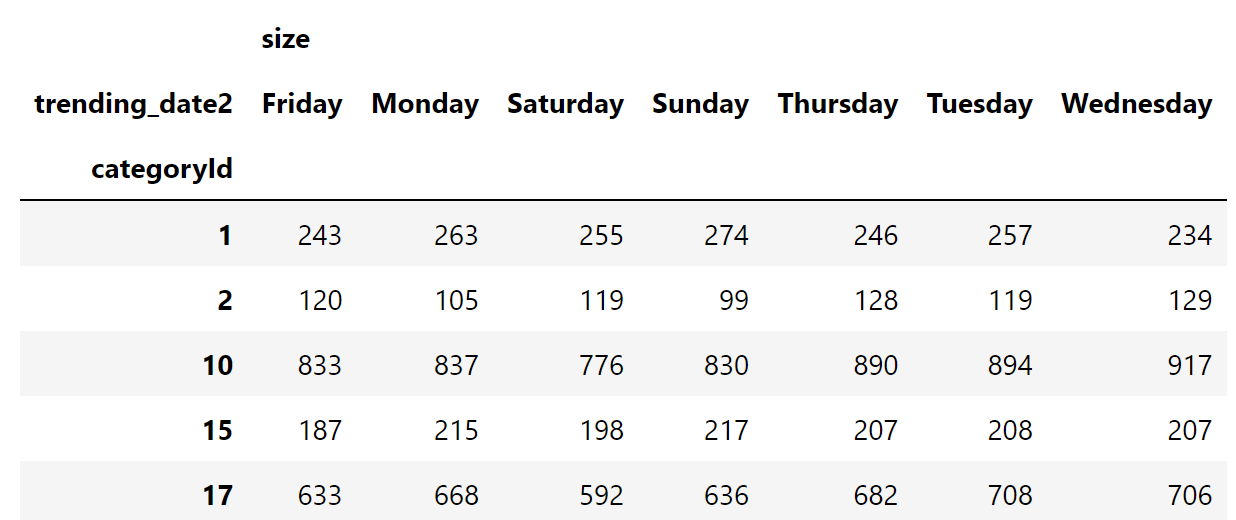

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv",index_col=0)
df.head(2)

,title,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channelId,trending_date2
0,[신병] 물자창고,장삐쭈,23,1893473,38249,730,8595,UChbE5OZQ6dRHECsX0tEPEZQ,2021-01-01
1,RAIN(비) - 나로 바꾸자 Switch to me (duet with JYP) MV,RAIN's Official Channel,10,2600864,0,0,20129,UCxXgIeE5hxWxHG6dz9Scg2w,2021-01-01


In [ ]:
# df['trending_date2']에 대해서 datetime dtype으로 변경 후, 요일의 이름을 받아옴
df['day_name'] = df['trending_date2'].astype('datetime64').dt.day_name()
df['day_name'].head(5)

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: day_name, dtype: object

In [ ]:
# 저라면 이렇게 풀이할 것 같습니다.
# 위와 같이 day_name을 만든 뒤에
# pivot_table을 사용해서  index, columns, aggfunc, values 를 사용하는 방법으로요.
A = df.pivot_table(index='categoryId', 
                   columns='day_name', 
                   aggfunc='count',   
                   values='trending_date2')
A.columns.name = 'trending_date2'
A

trending_date2,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
categoryId,,,,,,,
1,243,263,255,274,246,257,234
2,120,105,119,99,128,119,129
10,833,837,776,830,890,894,917
15,187,215,198,217,207,208,207
17,633,668,592,636,682,708,706
19,90,92,87,91,92,89,85
20,283,298,296,289,282,285,291
22,1288,1373,1289,1337,1341,1375,1333
23,568,594,570,556,560,569,566


### [Q9] 채널의 이름
- 가장 많은 트렌드 영상을 제작한 채널의 이름은 무엇인가? (날짜기준, 중복포함)

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv",index_col=0)
df.head(2)

,title,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channelId,trending_date2
0,[신병] 물자창고,장삐쭈,23,1893473,38249,730,8595,UChbE5OZQ6dRHECsX0tEPEZQ,2021-01-01
1,RAIN(비) - 나로 바꾸자 Switch to me (duet with JYP) MV,RAIN's Official Channel,10,2600864,0,0,20129,UCxXgIeE5hxWxHG6dz9Scg2w,2021-01-01


In [ ]:
# 'channelTitle' 별 개수를 세어, 가장 많은 개수를 갖는 것 (=처음 것)의 index를 출력함
ans = df['channelTitle'].value_counts().index[0]
print(ans)

짤툰


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
- 위의 링크로 들어가서 API를 한 번 살펴보세요!
- Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
   - sort=True, ascending=False 이기 때문에 내림차순 정렬이 되는 것입니다.

## datamanim 연습문제 - 유튜브 공범컨텐츠 동영상 데이터
- https://www.datamanim.com/dataset/03_dataq/typeone.html

### [Q19] viewcnt 증가량 dataframe생성
- 데이터 설명 : 유튜브 “공범” 컨텐츠 - 동영상 정보 ( 10분 간격 수집)
- dataurl1 (비디오 정보) = https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv
- dataurl2 (참가자 채널 정보)= https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv

In [ ]:
import pandas as pd

#channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
#display(channel.head(2))

video = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')
display(video.head(2))
video['ct'] = pd.to_datetime(video['ct'])
video.dtypes

,videopk,viewcnt,likecnt,dislikecnt,favoritecnt,cmcnt,ct,videoname
0,c5JQp6xafqc,1667010,30474,706,0,6587,2021-10-10 15:20:03,공범 EP1
1,c5JQp6xafqc,1669089,30495,707,0,6589,2021-10-10 15:30:03,공범 EP1


videopk                object
viewcnt                 int64
likecnt                 int64
dislikecnt              int64
favoritecnt             int64
cmcnt                   int64
ct             datetime64[ns]
videoname              object
dtype: object

In [ ]:
start = pd.to_datetime('2021-11-01 00:00:00')
end = pd.to_datetime('2021-11-01 15:00:00')

target = video.loc[(video['ct'] >= start) & (video['ct'] <= end)].reset_index()

def check(x):
    result = max(x) - min(x)
    return result

answer = target[['videoname', 'viewcnt']].groupby('videoname').agg(check)
print(answer)

           viewcnt
videoname         
 공범 EP1      13298
 공범 EP2      10300
 공범 EP3       9927
 공범 EP4       9824
 공범 EP5      10824
 공범 EP6      14141
 공범 EP7      26949
 공범 EP8      89147


- 질문 : check 부분이 이해가 안되요~
- agg는 집계함수를 실행하는 것으로 

In [ ]:
A = target[['videoname', 'viewcnt']].groupby('videoname')
# A를 출력해 보면 다음과 같습니다. 
# A는 'videoname'별로 그룹의 이름과 'videoname'과 'viewcnt'를 컬럼으로하는 데이터프레임을 tuple로 갖습니다.
# 반복문을 사용하여 살펴봅니다.
for temp in A:
    display(type(temp), temp)   

# tuple을 그룹이름과 df로 저장하여 출력해 봅니다.
for group_name, group_df in A:
    display(group_name, group_df.head(2))

In [ ]:
A = target[['videoname', 'viewcnt']].groupby('videoname')
# agg 함수는 그룹별 'viewcnt' Series를 parameter로 받습니다.
# 그룹별 'viewcnt' Series를 받는 이유는 집계(aggrigation)를 할 수 있는 '숫자형' 이기 때문입니다
# 그리고, agg에 인수로 넘긴 함수(예: check_temp)의 return 값을 모아서 DataFrame을 생성하여 반환합니다.
# 예를 들어 아래의 check_temp의 return을 x.shape 으로 하면 x.shape을 값으로 갖게 되고
# return 에 len(x)를 하면 len(x)를 값으로 갖는 DataFrame이 반환됩니다. - 그룹별로 90개씩의 데이터가 있어서 90으로 채워졌네요 ^^
def check_temp(x):
    display(type(x), x.head(2))
    #return x.shape   
    return len(x)

A.agg(check_temp) 

pandas.core.series.Series

0    3166400
1    3166721
Name: viewcnt, dtype: int64

pandas.core.series.Series

90    2188578
91    2188958
Name: viewcnt, dtype: int64

pandas.core.series.Series

180    1660916
181    1661455
Name: viewcnt, dtype: int64

pandas.core.series.Series

270    1808141
271    1808269
Name: viewcnt, dtype: int64

pandas.core.series.Series

360    1492223
361    1492451
Name: viewcnt, dtype: int64

pandas.core.series.Series

540    1735457
541    1735843
Name: viewcnt, dtype: int64

pandas.core.series.Series

450    1602201
451    1602711
Name: viewcnt, dtype: int64

pandas.core.series.Series

630    1196327
631    1198660
Name: viewcnt, dtype: int64

,viewcnt
videoname,
공범 EP1,90
공범 EP2,90
공범 EP3,90
공범 EP4,90
공범 EP5,90
공범 EP6,90
공범 EP7,90
공범 EP8,90


In [ ]:
# 이해를 돕기위해, 만일 'likecnt'가 'viewcnt' 앞에 있었다면  ?
A = target[['videoname', 'likecnt', 'viewcnt']].groupby('videoname')
# agg 함수는 그룹별 'likecnt' Series를 parameter로 받고, 그룹별 'viewcnt' Series를 parameter로 받습니다.
# 아래 결과를 스크롤해서 살펴보세요.
def check_temp(x):
    display(type(x), x.head(2))
    return sum(x)   # x의 합을 반환하면,  그룹별 합계를 값으로 갖는 DataFrame이 생성됩니다.

A.agg(check_temp) 

pandas.core.series.Series

0    40970
1    40973
Name: likecnt, dtype: int64

pandas.core.series.Series

90    25511
91    25516
Name: likecnt, dtype: int64

pandas.core.series.Series

180    22667
181    22667
Name: likecnt, dtype: int64

pandas.core.series.Series

270    22646
271    22647
Name: likecnt, dtype: int64

pandas.core.series.Series

360    19865
361    19867
Name: likecnt, dtype: int64

pandas.core.series.Series

540    24409
541    24412
Name: likecnt, dtype: int64

pandas.core.series.Series

450    29193
451    29199
Name: likecnt, dtype: int64

pandas.core.series.Series

630    24944
631    24969
Name: likecnt, dtype: int64

pandas.core.series.Series

0    3166400
1    3166721
Name: viewcnt, dtype: int64

pandas.core.series.Series

90    2188578
91    2188958
Name: viewcnt, dtype: int64

pandas.core.series.Series

180    1660916
181    1661455
Name: viewcnt, dtype: int64

pandas.core.series.Series

270    1808141
271    1808269
Name: viewcnt, dtype: int64

pandas.core.series.Series

360    1492223
361    1492451
Name: viewcnt, dtype: int64

pandas.core.series.Series

540    1735457
541    1735843
Name: viewcnt, dtype: int64

pandas.core.series.Series

450    1602201
451    1602711
Name: viewcnt, dtype: int64

pandas.core.series.Series

630    1196327
631    1198660
Name: viewcnt, dtype: int64

,likecnt,viewcnt
videoname,,
공범 EP1,3690147,285710215
공범 EP2,2298225,197533594
공범 EP3,2042031,150041751
공범 EP4,2040882,163294435
공범 EP5,1791184,134929383
공범 EP6,2200977,156998553
공범 EP7,2634681,145682198
공범 EP8,2279500,112572802


In [ ]:
##  결론, 
A = target[['videoname', 'viewcnt']].groupby('videoname')
# agg 함수는 'videoname' 그룹별, 'viewcnt' Series를 parameter로 받습니다. ==> x
# 그리고 각 그룹별 '최대값 - 최소값'을 구해서 DataFrame을 생성해 반환합니다.
def check_temp(x):
    result = max(x) - min(x)
    return result

A.agg(check_temp) 

,viewcnt
videoname,
공범 EP1,13298
공범 EP2,10300
공범 EP3,9927
공범 EP4,9824
공범 EP5,10824
공범 EP6,14141
공범 EP7,26949
공범 EP8,89147


In [ ]:
# 함수는 lambda로 전달해도 됩니다.
answer = target[['videoname', 'viewcnt']].groupby('videoname').agg(lambda x : max(x) - min(x))
answer

,viewcnt
videoname,
공범 EP1,13298
공범 EP2,10300
공범 EP3,9927
공범 EP4,9824
공범 EP5,10824
공범 EP6,14141
공범 EP7,26949
공범 EP8,89147


### [Q44] 전세계 행복도 지표 데이터
- 2018년도와 2019년도의 행복랭킹이 변화하지 않은 나라명의 수를 구하여라

In [ ]:
# 데이터 출처 :https://www.kaggle.com/unsdsn/world-happiness(참고, 데이터 수정)
# 데이터 설명 : 전세계 행복도 지표 조사
# data url = https://raw.githubusercontent.com/Datamanim/datarepo/main/happy2/happiness.csv

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/happy2/happiness.csv',encoding='utf-8')
df.head(3)

,행복랭킹,나라명,점수,상대GDP,사회적지원,행복기대치,선택의 자유도,관대함,부패에 대한인식,년도
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019


In [ ]:
# 풀이 방법
A = df.pivot_table(index='나라명', columns='년도', values='행복랭킹', aggfunc='sum')
sum(A[2018] == A[2019])

15

### [Q70] 포켓몬 데이터
- 한번씩만 존재하는  Type1, Type2의 쌍을 각 세대(Generation)은 각각 몇 개씩 가지고 있는가?

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/pok/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# [문제 이해]
X = df[['Type 1', 'Type 2']].value_counts()
Y = X[X==1]
Y.shape  # 39개!  (문제에서는 이 39개가 각 Generation에 몇 개씩 분포되어 있는지를 묻는 것입니다.)

(39,)

In [ ]:
# 피벗테이블을 사용하여 각 Generation 별로 ['Type 1', 'Type 2']에 대해 '#'의 개수를 세어 표시함
# reset_index()를 사용하여 Type 1, Type 2 라는 것을 columns에 넣음
A = df.pivot_table(index=['Type 1', 'Type 2'], 
               columns='Generation', 
               values='#', 
               aggfunc='count', 
               fill_value=0).reset_index()
A

Generation,Type 1,Type 2,1,2,3,4,5,6
0,Bug,Electric,0,0,0,0,2,0
1,Bug,Fighting,0,2,0,0,0,0
2,Bug,Fire,0,0,0,0,2,0
3,Bug,Flying,3,3,3,4,0,1
4,Bug,Ghost,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
131,Water,Ice,3,0,0,0,0,0
132,Water,Poison,2,1,0,0,0,0
133,Water,Psychic,4,1,0,0,0,0
134,Water,Rock,0,1,1,0,2,0


In [ ]:
# 위의 피벗테이블 A에서 Generation ( 1 ~ 6)의 합이 1 인 것을 찾고, 그 개수를 셈
# 1인 것에 대한 개수이므로 sum 함수를 사용함
# Series의 Name과 출력 형식을 맞추기 위해 Series를 새롭게 생성함
A['check'] = A.loc[:, 1:6].sum(axis=1)
B = A.loc[A['check']==1, 1:6].sum(axis=0)
result = pd.Series(B.values, name='Generation')
result

0     1
1     4
2     5
3    13
4     7
5     9
Name: Generation, dtype: int64

In [ ]:
result.sum()  #  합계를 구했을 때 39가 나와야 하는 것입니다.

39

## Machine Learning 관련

### 1.roc_auc_score
- sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
- https://rython.tistory.com/14 

    multi_class{‘raise’, ‘ovr’, ‘ovo’}, default=’raise’
    Only used for multiclass targets. Determines the type of configuration to use. The default value raises an error, so either 'ovr' or 'ovo' must be passed explicitly.
    'ovr': Stands for One-vs-rest. Computes the AUC of each class against the rest [3] [4]. This treats the multiclass case in the same way as the multilabel case. Sensitive to class imbalance even when average == 'macro', because class imbalance affects the composition of each of the ‘rest’ groupings.
    'ovo': Stands for One-vs-one. Computes the average AUC of all possible pairwise combinations of classes [5]. Insensitive to class imbalance when average == 'macro'

- 위의 링크를 클릭하여 average, multi_class 를 읽어 보시기 바랍니다.
- multi_class 는 다항분류의 경우 값을 전달하게 되는데요. 'ovo' 또는 'ovr' 중에 선택해야 합니다.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(max_iter=5000, random_state=0).fit(X, y)

# 이항분류 일때의 roc_acu_score 사용법
# clf.predict_proba(X)의 경우는 1개의 column에 대해 전달해 주어야 합니다.
# 두 가지 경우이므로 A, B에 저장해 보면 다음과 같고,  두 값을 더하면 1이 됩니다.
# 시험에서는 대부분 큰 값을 갖는 1에 대해 제출을 요구할 것입니다.
A = roc_auc_score(y, clf.predict_proba(X)[:, 0])
B = roc_auc_score(y, clf.predict_proba(X)[:, 1])
C = roc_auc_score(y, clf.decision_function(X))
print(A, B, A+B, C)

0.0053115585856984456 0.9946884414143016 1.0 0.9946884414143016


In [ ]:
# clf.predict_proba(X) 의 결과는 2D 이며, 종속변수의 범주개수만큼의 column이 있습니다.
# 첫 행의  [1.00000000e+00, 2.90774061e-14] 은 X의 첫 번째 데이터에 대한 Y 예측에 대한 확률 값으로
# 두 숫자를 더하면 1이되고,  Y=0일 확률이 1.00000000e+00이며, Y=1일 확률이 2.90774061e-14 라는 의미입니다.
# 즉, X의 첫 번째 데이터에 대한 predict 값은 0 입니다. 
clf.predict_proba(X)

array([[1.00000000e+00, 2.90774061e-14],
       [9.99996349e-01, 3.65057815e-06],
       [9.99999481e-01, 5.18504085e-07],
       ...,
       [9.97868581e-01, 2.13141928e-03],
       [1.00000000e+00, 7.63627346e-11],
       [1.27245249e-04, 9.99872755e-01]])

In [ ]:
# clf.predict_proba(X)의 데이터 프레임으로 만들어 보면 다음과 같습니다.
df = pd.DataFrame(clf.predict_proba(X), columns=['benign', 'malignant']) 
df.head(3)

,benign,malignant
0,1.000000,2.907741e-14
1,0.999996,3.650578e-06
2,0.999999,5.185041e-07


In [ ]:
# 예측값을 df에 추가해 보겠습니다.
df['y_pred'] = clf.predict(X)
df.tail(3)

,benign,malignant,y_pred
566,0.997869,2.131419e-03,0
567,1.000000,7.636273e-11,0
568,0.000127,9.998728e-01,1


In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(max_iter=5000, random_state=0).fit(X, y)

# 이항분류 일때의 roc_auc_score 사용법
# clf.predict_proba(X)를 그대로 전달합니다.   모든 클래스에 대해서 'ovo' 또는 'ovr'로 
A = roc_auc_score(y, clf.predict_proba(X), multi_class='ovo')
display(A)

0.9983333333333334

### 2.Warning 모음

LogisticRegression

- max_iter의 수를 1000 이상으로 늘리거나, tol 값을 0.001 보다 크게하도록 한다. 비용함수의 기울기가 tol 보다 작은 값을 갖도록 하는 지점을 못찾았는데 반복이 종료 되었다는 메시지임
-model4=LogisticRegression(**max_iter=5000**).fit(xtrain,ytrain)

    /usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
    STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

    Increase the number of iterations (max_iter) or scale the data as shown in:
        https://scikit-learn.org/stable/modules/preprocessing.html
    Please also refer to the documentation for alternative solver options:
        https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
    /usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
    "X does not have valid feature names, but"

    /usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
    "X does not have valid feature names, but"

### 3.groupby 결과로 DataFrame 생성

In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

Cloning into 'bigdata'...
remote: Enumerating objects: 50, done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (50/50), done.


In [ ]:
# [0] x_train, x_test 데이터로 생성함
# 문제 출제 형식에 맞도록 변환한 것입니다.  시험에서는 이런 코드가 없습니다.
import pandas as pd
from sklearn.model_selection import train_test_split

dftot = pd.read_csv('./bigdata/1st_Train.csv')
x_train, x_test = train_test_split(dftot, test_size=0.4, stratify=dftot['Reached.on.Time_Y.N'], random_state=0)
y_train = x_train[['Reached.on.Time_Y.N']]
x_train = x_train.drop(columns='Reached.on.Time_Y.N')
y_test = x_test[['Reached.on.Time_Y.N']]   # 이것은 시험에서는 제공되지 않음
x_test = x_test.drop(columns='Reached.on.Time_Y.N')

x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False) # 이것은 시험에서는 제공되지 않음

- 아래처럼 groupby() 안에 기준을 목록으로 두개 주고, 다시 그 기준 중 하나로 indexing을 하여 통계함수를 적용했을 때,
- ex. df.groupby(['A', 'B'])['A'].count()
- 결과는 pandas.core.series.Series로 나오는 걸 확인했는데요. 이걸 다른 데이터프레임에 새로운 컬럼으로 생성하고 싶을 때, 
- 위에 ex에서 출력되어 보이는 것들 중 기준들은 그냥 index 개념이 되는 거고, 통계함수로 구해진 것들만 생성하고 싶은 컬럼의 값들로 들어가게 되는건가요?



In [ ]:
# 네 맞습니다! 결과로 생성된 Series의 index가 DataFrame의 index가 되고, 
# values가 하나의 컬럼의 값이 되는 것입니다.

result['Count'] = temp 에서 result 라는 데이터 프레임에 Count라는 새로운 컬럼을 추가하고 그 내용을 groupby하여 통계함수를 적용시켜 나온 값을 넣은 것으로 이해했습니다. 그런데 print(result)에는 groupby의 기준들(Warehouse_block, Reached.on.TIme_Y.N)까지 값으로 들어간 것 같아 조금 헷갈리네요!

In [ ]:
#  MultiIndex로 표시된 것 뿐입니다.   
#  result.index 를 출력해 보시기 바랍니다.

In [ ]:
feature = 'Warehouse_block'
df = pd.concat([x_train, y_train], axis=1)

result = pd.DataFrame()
temp = df.groupby([feature, 'Reached.on.Time_Y.N'])[feature].count()
result['Count'] = temp
result

Count
Warehouse_block Reached.on.Time_Y.N       
A               0                      430
                1                      674
B               0                      454
                1                      649
C               0                      442
                1                      642
D               0                      436
                1                      635
F               0                      899
                1                     1338

In [ ]:
result.index

MultiIndex([('A', 0),
            ('A', 1),
            ('B', 0),
            ('B', 1),
            ('C', 0),
            ('C', 1),
            ('D', 0),
            ('D', 1),
            ('F', 0),
            ('F', 1)],
           names=['Warehouse_block', 'Reached.on.Time_Y.N'])

### 4.코드 오류

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
dftot = pd.read_csv('./bigdata/1st_Train.csv')
x_train, x_test = train_test_split(dftot, test_size=0.4, stratify=dftot['Reached.on.Time_Y.N'], random_state=0)

y_train = x_train[['Reached.on.Time_Y.N']]
x_train = x_train.drop(columns='Reached.on.Time_Y.N')
y_test = x_test[['Reached.on.Time_Y.N']]   # 이것은 시험에서는 제공되지 않음
x_test = x_test.drop(columns='Reached.on.Time_Y.N')

x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False) # 이것은 시험에서는 제공되지 않음

# [Q0] 이것이 빠졌었습니다.
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

#전처리 (원핫인코더 , 결측값)
#타입확인( Warehouse_block,  Mode_of_Shipment,  Product_importance,  Gender)
from sklearn.preprocessing import LabelEncoder
x_train.loc[:,['Warehouse_block' ,'Mode_of_Shipment', 'Product_importance', 'Gender']]= x_train.loc[:,['Warehouse_block' ,'Mode_of_Shipment', 'Product_importance', 'Gender']].apply(LabelEncoder().fit_transform)
x_test.loc[:,['Warehouse_block' ,'Mode_of_Shipment', 'Product_importance', 'Gender']]= x_test.loc[:,['Warehouse_block' ,'Mode_of_Shipment', 'Product_importance', 'Gender']].apply(LabelEncoder().fit_transform)
#결측치확인
print(x_train.isnull().sum())


#모델링
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

RF = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth= 5)
KNN = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=30, p=2)
DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=2, min_samples_leaf=1)

# [Q1] y_train의 경우 1차원 이어야 하는데 2차원으로 되어 있습니다.
print(f'x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}')
# 1차원으로 만들기 위해 'Reached.on.Time_Y.N'꺼내오기
y_train = y_train['Reached.on.Time_Y.N']   
print(f'x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}')

RF.fit(x_train,y_train)
KNN.fit(x_train,y_train)
DT.fit(x_train,y_train)

# [Q2] Hold-out 안하고 그냥 통채로 학습시키시려는 거죠??
print('RF점수:',RF.score(x_train,y_train))
print('KNN점수:',KNN.score(x_train,y_train))
print('DT점수:',DT.score(x_train,y_train))

#KNN선정
pred = KNN.predict_proba(x_test)
pred = pd.DataFrame(pred)
pred = pred.iloc[:,1]
x_test_id = x_test.loc[:,'ID']
pred.shape, x_test_id.shape
#print(x_test_id)
#print(pred)

print(x_test_id[:5])
print(pred[:5])
sub = pd.concat([x_test_id,pred], axis =1 )
print(sub)

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64
x_train.shape = (6599, 11), y_train.shape = (6599, 1)
x_train.shape = (6599, 11), y_train.shape = (6599,)
RF점수: 0.6923776329746931
KNN점수: 0.7779966661615396
DT점수: 0.6896499469616608
0     7007
1     9793
2     6593
3    10527
4     6914
Name: ID, dtype: int64
0    0.2
1    0.6
2    0.6
3    0.8
4    0.8
Name: 1, dtype: float64
         ID    1
0      7007  0.2
1      9793  0.6
2      6593  0.6
3     10527  0.8
4      6914  0.8
...     ...  ...
4395   3142  0.8
4396   6948  0.4
4397   7531  1.0
4398   8398  0.8
4399  10252  0.6

[4400 rows x 2 columns]


### 5.분류 모델 암기

In [ ]:
# [0] 사용 라이브러리 import
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report

### 6.회귀 모델 암기

In [ ]:
# [0] 사용 라이브러리 import
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_log_error as MSLE

### 7.철자를 잊었다면 dir, 사용법 볼 때는 help

In [ ]:
# sklearn 뒤에 어떤 그룹인지 생각나지 않을 때
import sklearn
print([x for x in dir(sklearn) if x[0] != '_'])

['base', 'clone', 'config_context', 'decomposition', 'dummy', 'ensemble', 'exceptions', 'externals', 'get_config', 'linear_model', 'logger', 'logging', 'metrics', 'model_selection', 'neighbors', 'os', 'preprocessing', 'random', 'set_config', 'setup_module', 'show_versions', 'svm', 'sys', 'tree', 'utils']


In [ ]:
# 어떤 그룹의 특정 모델 이름이 생각나지 않을 때
from sklearn import ensemble
print([x for x in dir(ensemble) if x[0] != '_'])

['AdaBoostClassifier', 'AdaBoostRegressor', 'BaggingClassifier', 'BaggingRegressor', 'BaseEnsemble', 'ExtraTreesClassifier', 'ExtraTreesRegressor', 'GradientBoostingClassifier', 'GradientBoostingRegressor', 'HistGradientBoostingClassifier', 'HistGradientBoostingRegressor', 'IsolationForest', 'RandomForestClassifier', 'RandomForestRegressor', 'RandomTreesEmbedding', 'StackingClassifier', 'StackingRegressor', 'VotingClassifier', 'VotingRegressor']


In [ ]:
# 평가지표가 생각나지 않을 때!
from sklearn import metrics
print([x for x in dir(metrics) if x[0] != '_'])

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_gamma_deviance', 'mean_pinball_loss', 'mean_poisson_deviance', 'mean

In [ ]:
# 특정 객체의 parameter가 생각나지 않을 때
from sklearn.ensemble import RandomForestClassifier
help(RandomForestClassifier)

In [ ]:
from sklearn.metrics import f1_score
help(f1_score)

### 8.변수 중요도 표시, 모델저장

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report

# 데이타가 많은경우 모두 출력 안되고 ... 으로 생략해서 출력됨.
pd.set_option('display.max_rows',500)    #출력할 max row를 지정
pd.set_option('display.max_columns',20)  #출력할 max columns를 지정
#출력 format 지정 - 소수점아래 2자리까지
pd.set_option('display.float_format', '{:.2f}'.format)


train = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/travel_insurance_train03.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/travel_insurance_test03.csv')
Xtrain = train.drop(columns='TravelInsurance')
Xtrain.to_csv('X_train.csv', index=False)
train[['Unnamed: 0', 'TravelInsurance']].to_csv('y_train.csv', index=False)
test.to_csv('X_test.csv', index=False)

X = pd.read_csv('X_train.csv')
Y = pd.read_csv('y_train.csv')
X_submission = pd.read_csv('X_test.csv')

dfX = pd.concat([X, X_submission], axis=0)

# 모델을 다시 사용하기 위해서는 컬럼별로 LabelEncoder를 사용 및 저장하는 것이 필요함
le_obj = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
le_list = []  # LabelEncoder 객체를 저장해 놓을 리스트
for x in le_obj:
    le = LabelEncoder()
    dfX[x] = le.fit_transform(dfX[x])
    le_list.append(le)  # LabelEncoder 저장

dfX = dfX.drop(columns='Unnamed: 0')  # 모델링에 불필요한 변수 제거
X1 = dfX.iloc[:X.shape[0], :]
X_submission1 = dfX.iloc[X.shape[0]:, :]
Y1 = Y['TravelInsurance']
print(X.columns)
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_submission1 = scaler.transform(X_submission1)

r = train_test_split(X1, Y1, test_size=0.25, stratify=Y1, random_state=1127)
x_train, x_test, y_train, y_test = r

model = RandomForestClassifier(max_depth=3, random_state=0).fit(x_train, y_train)

# [모델 중요도]
s = pd.Series(model.feature_importances_ , index=X.columns[1:])
display(s.to_frame().T)

# [모델 저장 & 가져오기]
import shelve

# [모델 저장하기] - 모델 + 스케일러, LabelEncoder 저장 필요 (전처리에 사용된 객체들)
with shelve.open('my_models') as data:
    data['ti_model'] = model
    data['ti_scaler'] = scaler
    data['ti_le_list'] = le_list
    data['ti_le_obj'] = ['Employment Type', 'GraduateOrNot', 
                         'FrequentFlyer', 'EverTravelledAbroad']


Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.09,0.03,0.00,0.40,0.04,0.01,0.13,0.30


In [ ]:
# [모델 가져오기]
import shelve

# [모델 가져오기]
with shelve.open('my_models') as data:
    ti_model = data['ti_model']
    ti_scaler = data['ti_scaler']
    ti_le_list = data['ti_le_list']
    ti_le_obj = data['ti_le_obj']

# LabelEncoder 객체 사용
new_data = pd.DataFrame([[26, 'Private Sector/Self Employed', 'Yes', 1400000, 3, 1,'No', 'Yes'],
                         [28, 'Government Sector', 'Yes', 1000000, 5, 0,'No', 'No']],
                        columns=X.columns[1:])

for le, feature_name in zip(ti_le_list, ti_le_obj):
    #print(le, feature_name, sep='\n')
    new_data[feature_name] = le.transform(new_data[feature_name])

# 스케일러 적용
#display(new_data)
new_data2 = scaler.transform(new_data)

# 예측값 구하기
ti_model.predict(new_data2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,26,1,1,1400000,3,1,0,1
1,28,0,1,1000000,5,0,0,0


array([1, 0])

### 9.Error 확인

In [ ]:
# [1] df1 파일 하나일 때, 데이터셋 분할하기
dfXY = df1.drop(columns = ['사업자등록번호', '데이터수집일자', 
                          '조사년도', '재무제표기준년월', '기업코드', 
                          '기업명', 'CRI기준일', '사업자등록번호_마스킹', 
                          '대표자명', '산업분류코드', '설립일', '주소', 
                          '중분류코드', '소분류코드'])

# 모델을 다시 사용하기 위해서는 컬럼별로 LabelEncoder를 사용 및 저장
le_obj = ['CRI등급', '재무보고서구분코드', '재무보고서명칭',
          '재무제표계정과목코드', '재무제표계정과목명', '기업규모명',
          '산업분류코드설명', '기업형태', '산업분류코드설명중분류',
          '산업분류코드설명소분류', '중분류항목명', '소분류항목명']

le_list = []  # LabelEncoder 객체를 저장해 놓을 리스트
for x in le_obj:
    le = LabelEncoder()
    dfXY[x] = le.fit_transform(dfXY[x])
    le_list.append(le)  # LabelEncoder 저장

X = dfXY.drop(columns='CRI등급')  # 모델링에 불필요한 종속 변수 제거
Y = dfXY['CRI등급']

print(X.shape, Y.shape)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 10.sklearn 의 dataset을 DataFrame으로 만들기

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
temp = load_diabetes()
dir(temp)  # data의 속성 확인

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [ ]:
# data   # 입력
# feature_names # 입력에 대한 컬럼명
# target # 출력

In [ ]:
df = pd.DataFrame(temp.data, columns = temp.feature_names)
df['target'] = temp.target
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


------------------------------------

In [ ]:
# 아래는 그냥 제가 보려고 넣은 것입니당

import pandas as pd
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype

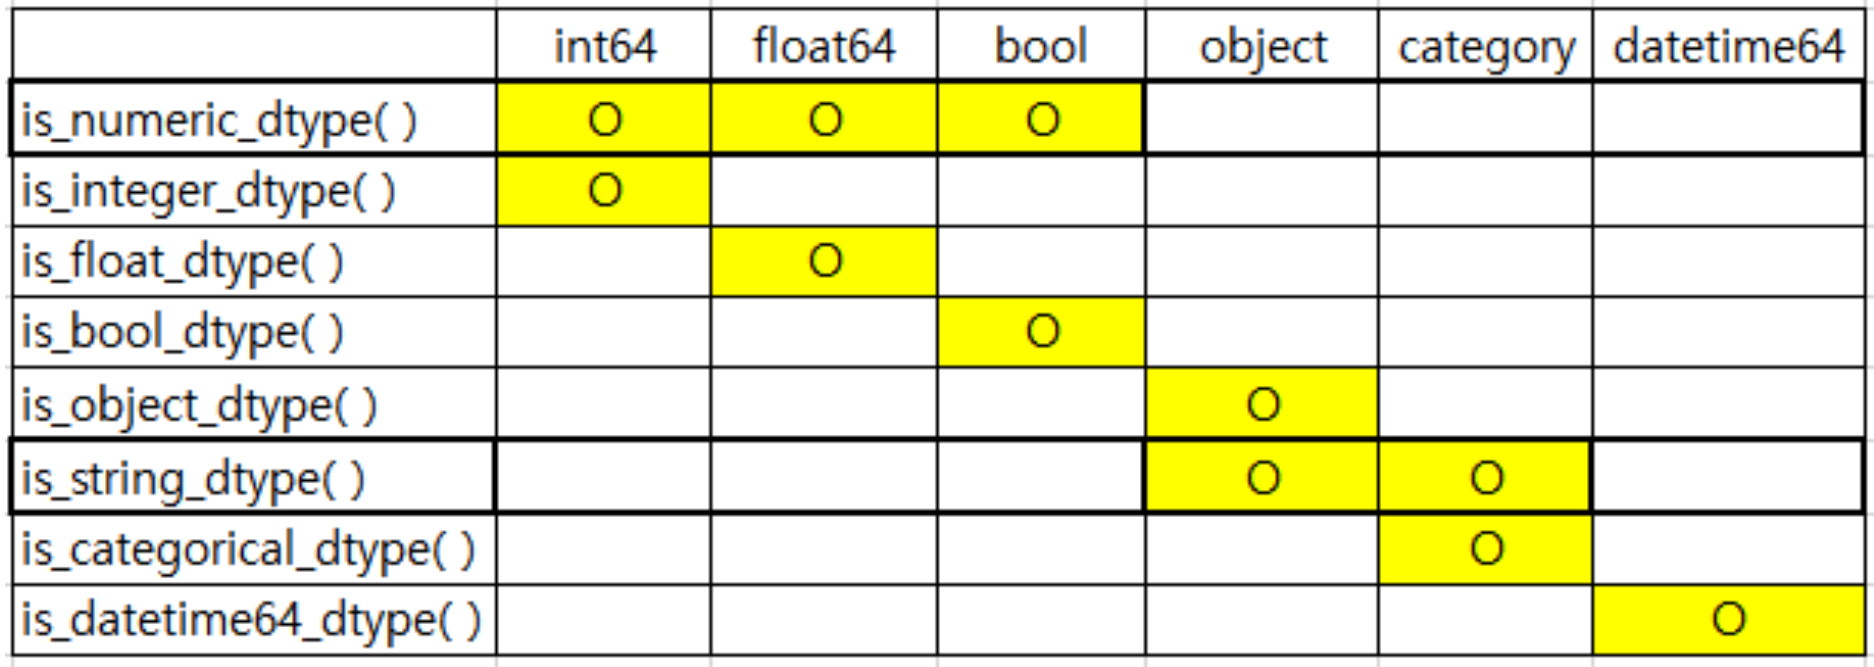